# Project 1

https://docs.google.com/presentation/d/1VJ-vdTfxyUtMELZSqTaRp3NjBw2FGG3ja1wewZrAReM/edit#slide=id.p

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
! ls ../data     #!runs commands in the command line

act.csv sat.csv


In [3]:
#!head ../data/act.csv        #check with the !head 

In [4]:
act_df = pd.read_csv('../data/act.csv')

In [5]:
sat_df = pd.read_csv('../data/sat.csv')

##### 2. Print the first ten rows of each dataframe.

In [6]:
act_df.head(10)

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,5,California,31%,22.5,22.7,23.1,22.2,22.8
6,6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [7]:
sat_df.head(10)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5%,593,572,1165
1,1,Alaska,38%,547,533,1080
2,2,Arizona,30%,563,553,1116
3,3,Arkansas,3%,614,594,1208
4,4,California,53%,531,524,1055
5,5,Colorado,11%,606,595,1201
6,6,Connecticut,100%,530,512,1041
7,7,Delaware,100%,503,492,996
8,8,District of Columbia,100%,482,468,950
9,9,Florida,83%,520,497,1017


##### 3. Describe in words what each variable (column) is.

## ACT: Description of Variables

In order, the columns used to sort the ACT data are: "Unamed-0", "State", "Participation", "English", "Math", "Reading", "Science", & "Composite". 

- The "State" values represent the physical origin where the data was collected. The series is formed by strings. 

- "Participation", displays the average number--in a series of objects--of students within the state who participated in taking the exam.

- The "English" column, which is formed by integers, represents the subject and the average English scores of the participants.

- "Math" columns, represents the average Math scores of the participants in a series of integers.

- "Science" column, also formed by integers, represents the average score of the participants.

- "Composite", which is formed by integers, is the average of the four test scores rounded to the nearest whole number.


## SAT Variables: Description of Variables


In order, the columns used to sort the SAT data are: "Unamed-0", "State", "Participation", "Evidence-Based Reading and Writing", "Math", & "Total".

- "State", represents the physical origin where the data was collected in a series of objects. 

- "Participation", represents the average number of students within the state who participated in taking the exam in a series of objects.

- "Evidence-Based Reading and Writing", represents the average score of the participants in a series of integers.

- "Math", represents the average Math scores of the participants in a series of integers.

- "Total", represents the average of the two sub-scores in a series of integers.

##### 4. Does the data look complete? Are there any obvious issues with the observations?

## ACT: Issues with the Observations:
- In the ACT data, the minimum value under the "Science" column (2.3) is wrong compared to the original data from the source; should be 23.2. 

- Additionally, the Participation column should be converted into an integer.

## SAT: Issues with the Observations:

- In the SAT Dataframe, the "Math" column seems to have a wrong minimum value of 52, when it should be 524. 

- The Participation column should be converted into an integer.

##### 5. Print the types of each column.

In [8]:
sat_df.dtypes

Unnamed: 0                             int64
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [9]:
act_df.dtypes

Unnamed: 0         int64
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

##### 6. Do any types need to be reassigned? If so, go ahead and do it.

In [10]:
act_df.drop(act_df.columns[0], axis = 1, inplace = True)

In [11]:
act_df['Participation'] = act_df['Participation'].map(lambda x : float(x.replace('%', ''))/100)

In [12]:
act_df.loc[21, 'Science'] = 23.2

In [13]:
sat_df.drop(sat_df[['Unnamed: 0']], axis = 1, inplace = True)

In [14]:
sat_df['Participation'] = sat_df['Participation'].map(lambda x : float(x.replace('%', ''))/100)

In [15]:
sat_df.loc[20, 'Math'] = 524

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [16]:
sat_state_dict = sat_df.set_index('State').to_dict()

In [17]:
act_state_dict = act_df.set_index('State').to_dict()

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [18]:
sat_col_dict = sat_df.to_dict('list')

In [19]:
act_col_dict = act_df.to_dict('list')

##### 9. Merge the dataframes on the state column.

In [20]:
act_df.merge(sat_df, on = 'State').head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [21]:
df = act_df.merge(sat_df, on = 'State')

In [22]:
df.head()

,State,Participation_x,English,Math_x,Reading,Science,Composite,Participation_y,Evidence-Based Reading and Writing,Math_y,Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


In [23]:
#act_df.merge(sat_df, left_on = 'act_State', right_on = 'act_state')

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [24]:
df.columns

Index(['State', 'Participation_x', 'English', 'Math_x', 'Reading', 'Science',
       'Composite', 'Participation_y', 'Evidence-Based Reading and Writing',
       'Math_y', 'Total'],
      dtype='object')

In [25]:
df.columns = ['State', 'ACT_Participation', 'ACT_English', 'ACT_Math', 'ACT_Reading', 'ACT_Science', 'ACT_Composite', 'SAT_Participation', 'SAT_Reading_Writing', 'SAT_Math', 'SAT_Total']

In [26]:
df.head()

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Reading_Writing,SAT_Math,SAT_Total
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8,0.38,547,533,1080
2,Arizona,0.62,18.6,19.8,20.1,19.8,19.7,0.30,563,553,1116
3,Arkansas,1.00,18.9,19.0,19.7,19.5,19.4,0.03,614,594,1208
4,California,0.31,22.5,22.7,23.1,22.2,22.8,0.53,531,524,1055


##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [27]:
df.agg(['min', 'max'])

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Reading_Writing,SAT_Math,SAT_Total
min,Alabama,0.08,16.3,18.0,18.1,18.2,17.8,0.02,482,468,950
max,Wyoming,1.00,25.5,25.3,26.0,24.9,25.5,1.00,644,651,1295


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$




To calculate the standard deviation of those numbers:

1. Work out the Mean
2. Then, for each number: subtract the Mean and square the result
3. Then, work out the mean of those squared differences.
4. Take the square root of that and we are done!

`ds_act_participation = np.sqrt(np.mean([(x - np.mean(df['ACT_Participation']))**2 for x in df['ACT_Participation']]))`

`df['ACT_Participation'].std(ddof = 0)`

In [28]:
def std_deviator(series):
    std_dev = np.sqrt(np.mean([(x - np.mean(series))**2 for x in series]))
    return std_dev

In [29]:
sd = []

c_names = df.drop('State', 1).columns

for col in c_names:
    sd.append(std_deviator(df[col]))

In [30]:
sd

[0.31824175751231804,
 2.3304876369363368,
 1.9624620273436781,
 2.046902931484265,
 1.7222161451443672,
 2.0007860815819893,
 0.3492907076664507,
 45.21697020437866,
 46.65713364485504,
 91.58351056778743]

## Step 2: Manipulate the dataframe¶


##### 13. Turn the list `sd` into a new observation in your dataset.

In [31]:
sd_dict = dict(zip(c_names, sd))

In [32]:
df_with_std_dev = df.append(sd_dict, ignore_index = True)

In [33]:
df_with_std_dev.fillna('Standard Deviation', inplace =True)

In [34]:
df_with_std_dev.tail()

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Reading_Writing,SAT_Math,SAT_Total
47,Washington,0.290000,20.900000,21.900000,22.100000,22.000000,21.900000,0.640000,541.00000,534.000000,1075.000000
48,West Virginia,0.690000,20.000000,19.400000,21.200000,20.500000,20.400000,0.140000,558.00000,528.000000,1086.000000
49,Wisconsin,1.000000,19.700000,20.400000,20.600000,20.900000,20.500000,0.030000,642.00000,649.000000,1291.000000
50,Wyoming,1.000000,19.400000,19.800000,20.800000,20.600000,20.200000,0.030000,626.00000,604.000000,1230.000000
51,Standard Deviation,0.318242,2.330488,1.962462,2.046903,1.722216,2.000786,0.349291,45.21697,46.657134,91.583511


##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [35]:
df.sort_values('SAT_Participation', ascending= False, inplace = True)

##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [36]:
df[df['SAT_Participation'] > .75]

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Reading_Writing,SAT_Math,SAT_Total
8,District of Columbia,0.32,24.4,23.5,24.9,23.5,24.2,1.00,482,468,950
22,Michigan,0.29,24.1,23.7,24.5,23.8,24.1,1.00,509,495,1005
6,Connecticut,0.31,25.5,24.6,25.6,24.6,25.2,1.00,530,512,1041
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,996
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,1052
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,1012
12,Idaho,0.38,21.9,21.8,23.0,22.1,22.3,0.93,513,493,1005
9,Florida,0.73,19.0,19.4,21.0,19.4,19.8,0.83,520,497,1017
21,Massachusetts,0.29,25.4,25.3,25.9,24.7,25.4,0.76,555,551,1107


In [37]:
df[df['ACT_Participation'] > .90]

,State,ACT_Participation,ACT_English,ACT_Math,ACT_Reading,ACT_Science,ACT_Composite,SAT_Participation,SAT_Reading_Writing,SAT_Math,SAT_Total
40,South Carolina,1.00,17.5,18.6,19.1,18.9,18.7,0.50,543,521,1064
33,North Carolina,1.00,17.8,19.3,19.6,19.3,19.1,0.49,546,535,1081
28,Nevada,1.00,16.3,18.0,18.1,18.2,17.8,0.26,563,553,1116
5,Colorado,1.00,20.1,20.3,21.2,20.9,20.8,0.11,606,595,1201
26,Montana,1.00,19.0,20.2,21.0,20.5,20.3,0.10,605,591,1196
13,Illinois,0.93,21.0,21.2,21.6,21.3,21.4,0.09,559,556,1115
36,Oklahoma,1.00,18.5,18.8,20.1,19.6,19.4,0.07,530,517,1047
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2,0.05,593,572,1165
42,Tennessee,1.00,19.5,19.2,20.1,19.9,19.8,0.05,623,604,1228
17,Kentucky,1.00,19.6,19.4,20.5,20.1,20.0,0.04,631,616,1247


In [38]:
#df.query('SAT_Participation > .75', inplace = False)

## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

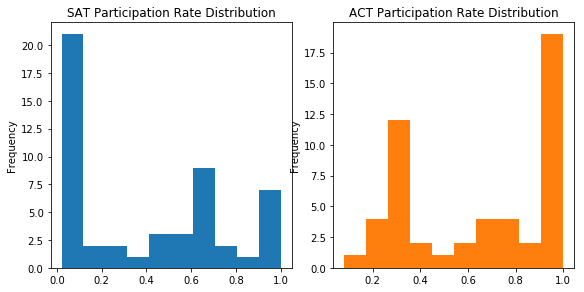

In [39]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.tight_layout()

df['ACT_Participation'].plot(kind="hist", bins = 10, ax = ax[1], title = 'ACT Participation Rate Distribution')
df['ACT_Participation'].plot(kind="hist", bins = 10, ax = ax[1])
df['SAT_Participation'].plot(kind = 'hist',bins = 10, ax = ax[0], title = 'SAT Participation Rate Distribution');

##### 17. Plot the Math(s) distributions from both data sets.

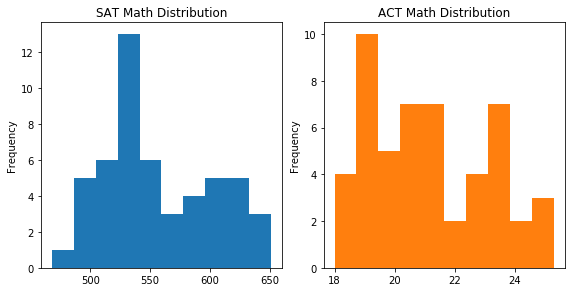

In [40]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.tight_layout()

df['ACT_Math'].plot(kind="hist", ax = ax[1], title = 'ACT Math Distribution')
df['ACT_Math'].plot(kind="hist", ax = ax[1])
df['SAT_Math'].plot(kind = 'hist', ax = ax[0], title = 'SAT Math Distribution');

##### 18. Plot the Verbal distributions from both data sets.

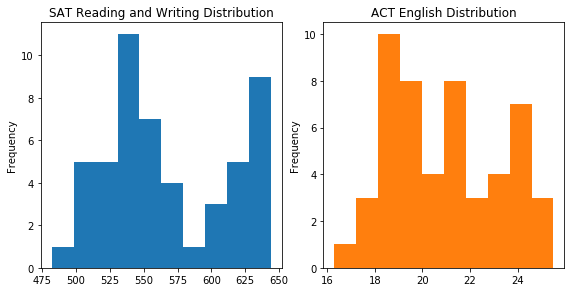

In [41]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
plt.tight_layout()

df['ACT_English'].plot(kind="hist", ax = ax[1], title = 'ACT English Distribution')
df['ACT_English'].plot(kind="hist", ax = ax[1])
df['SAT_Reading_Writing'].plot(kind = 'hist', ax = ax[0], title = 'SAT Reading and Writing Distribution');

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

#### The most common assuption can be made by evaluating the central tendency, spread, and shape/symmetry of a graph.

- The central tendancy will dictate how well the sample is distributed and where the results seem to cluster, which will allow us to see the mean, median, mode, and standard deviation.

- The shape of the graph will show us the skew and how the graph is spread out; including the amount of variance or clusters under the shape.


 #### For example, with the SAT Participation distribution, we can conclude:


- The average participation rate is 40%.
- Resulting in a bimodal shape due to a cluster under the mean value of .40% and the high value outliers near 100%. 
- Additionally, the distribution has a relatively low variance.

###### 20. Does this assumption hold true for any of our columns? Which?

#### The assumption for the SAT Participation does hold true. 

- The graph is positivley skewed due to the average being 40%.
- Bimodal shape seems to be apperent due to the cluster under the average and the high value outlier with high percentage rates.
- Also, the grapgh seems to have a low spread due to the sample size.

##### 21. Plot some scatterplots examining relationships between all variables.

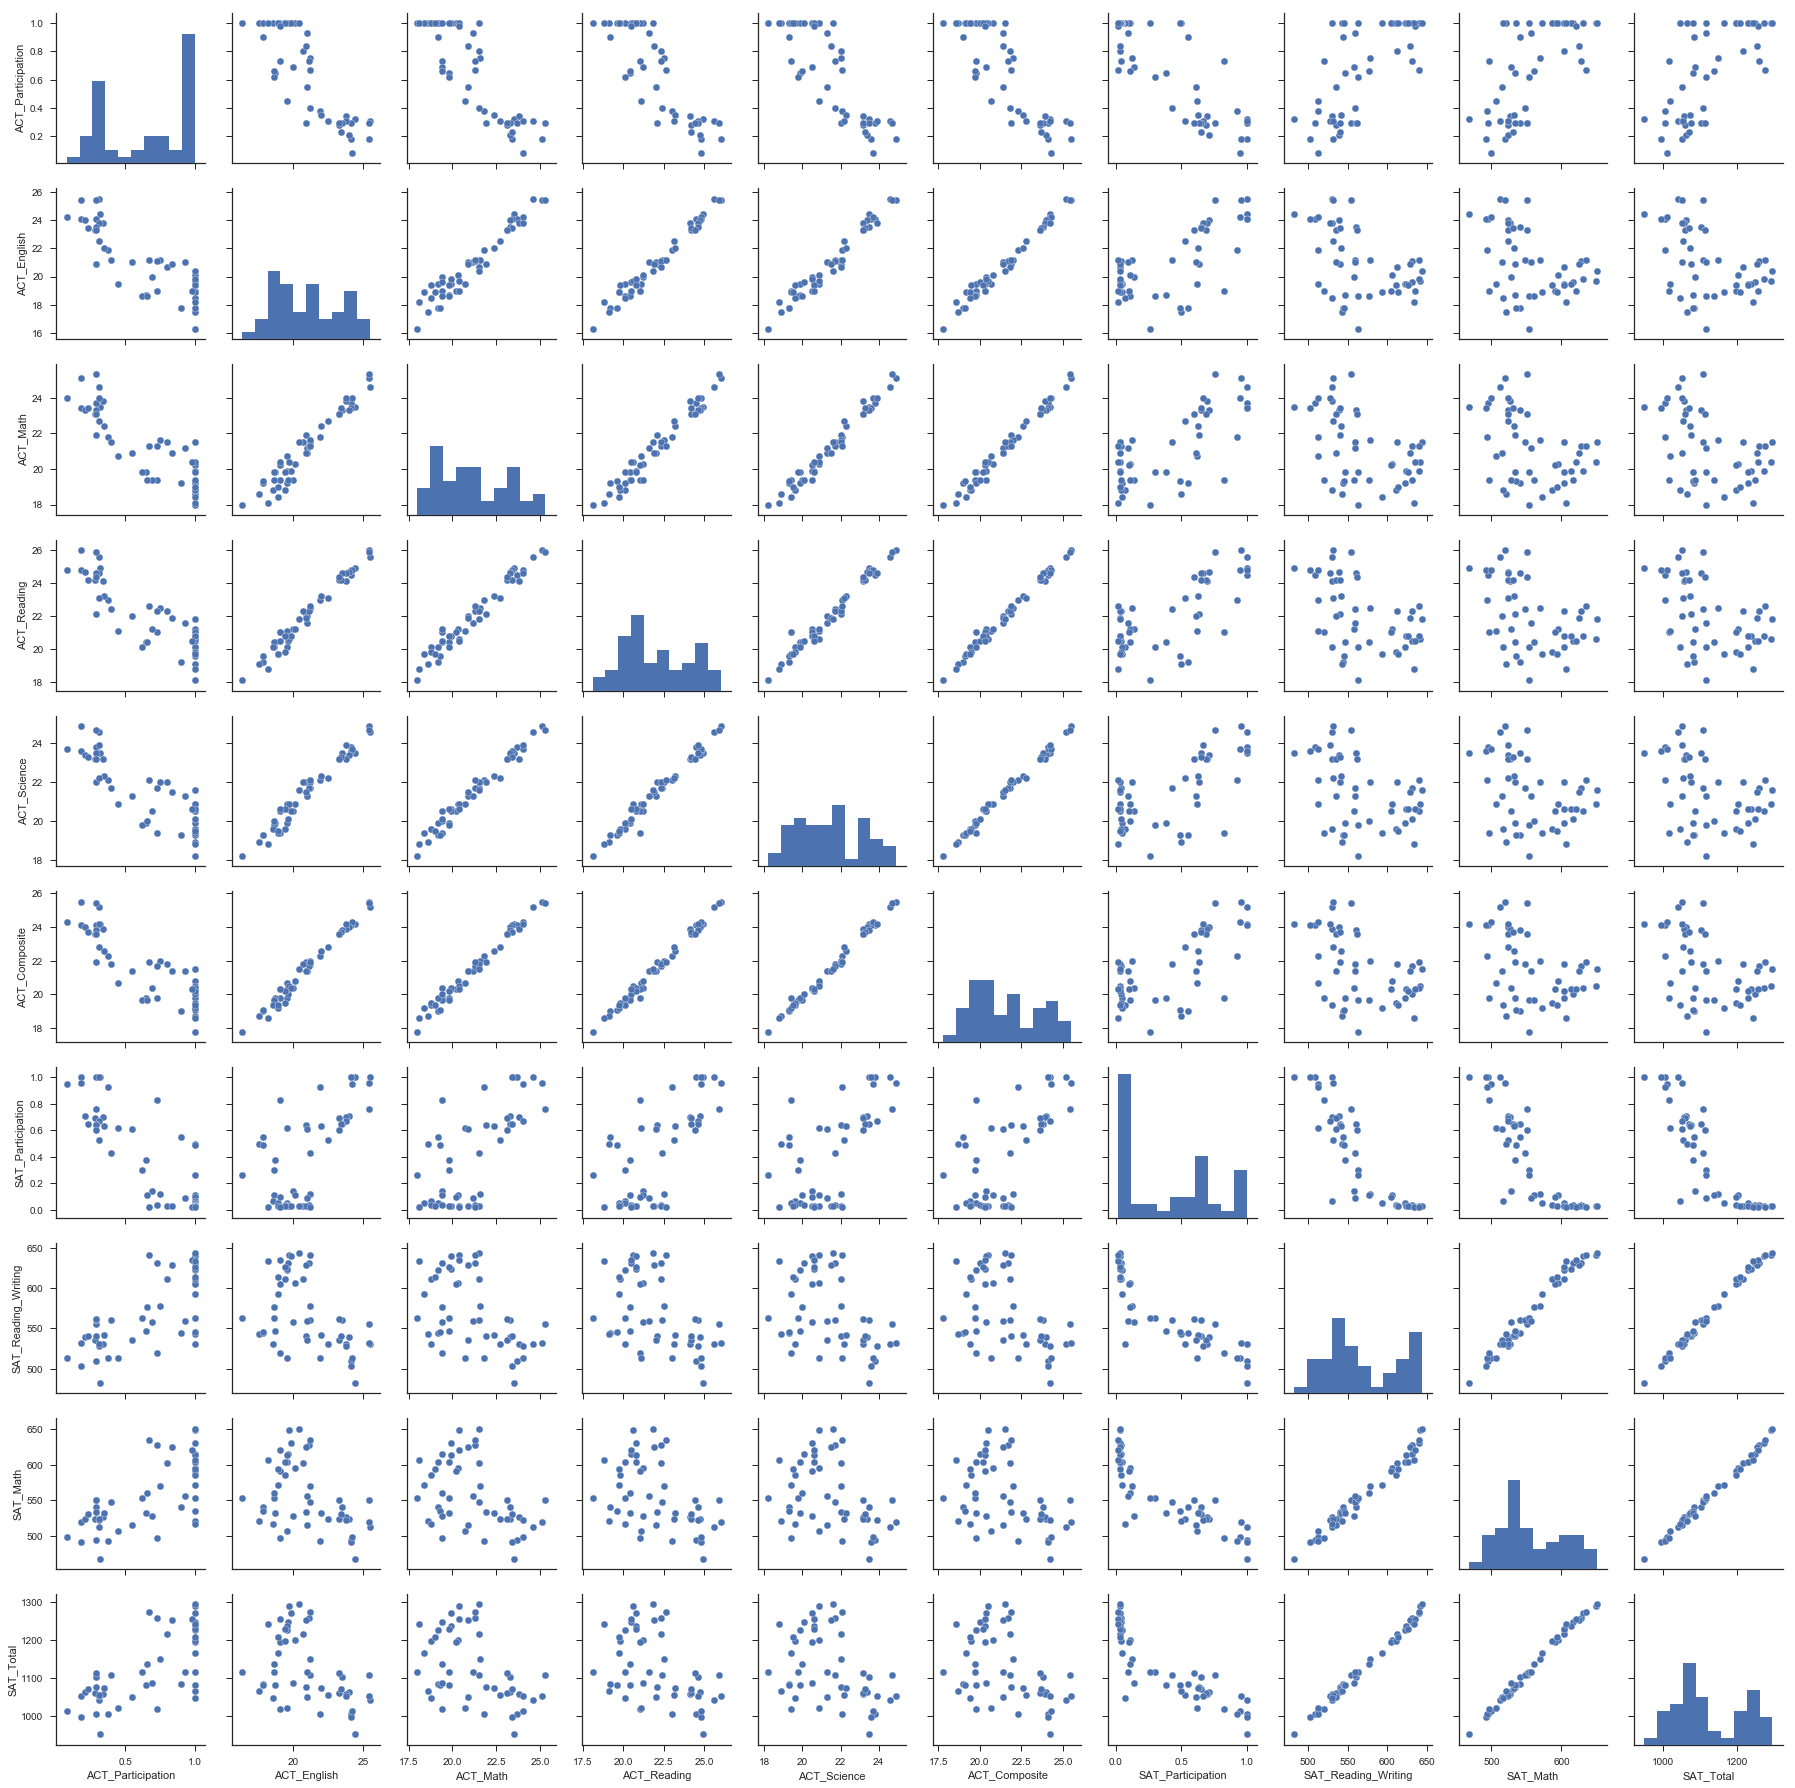

In [42]:
sns.set(style="ticks")

sns.pairplot(df)

##### 22. Are there any interesting relationships to note?

### Correlations:

- Yes, oddly, the ACT & SAT Participation seems to be negatively correlated with their respective subjects and accumulated scores. However, both particiaption rates seem to have a positive correlation with the opposite exam's subject and accumulated score. 

- Another interesting relationship deals with the State and Participation Rates of both exams. Several States have a high participation rate on one exam and low on the other, in other words, where some States have a high participation rate for the SAT, the ACT will have a low rate of participation. This relationship is true in many sates.

##### 23. Create box plots for each variable. 

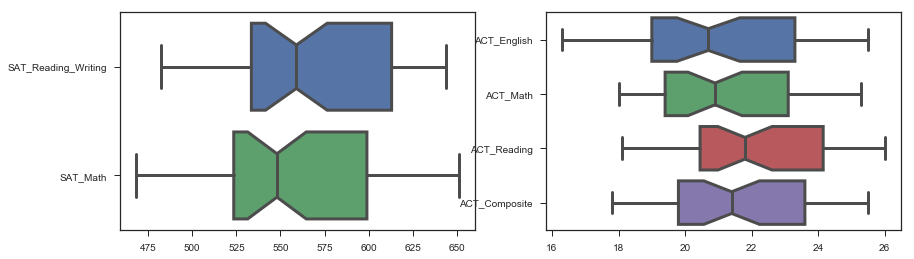

In [43]:
fig = plt.figure(figsize=(14, 4))
plt.tight_layout()

fig.add_subplot(1, 2, 1)
sns.boxplot(data = df[['SAT_Reading_Writing', 'SAT_Math']], orient='horizontal', fliersize=8, linewidth=3, notch=True, saturation=0.8)
fig.add_subplot(1, 2, 2)
sns.boxplot(data = df[['ACT_English', 'ACT_Math', 'ACT_Reading', 'ACT_Composite']], orient='h', fliersize=8, linewidth=3, notch=True, saturation=0.8);


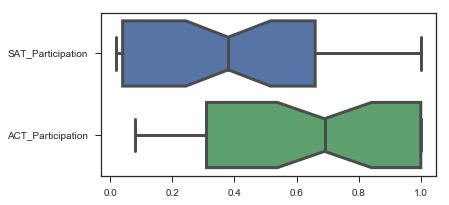

In [44]:
fig = plt.figure(figsize=(6, 3))
plt.tight_layout()

sns.boxplot(data = df[['SAT_Participation', 'ACT_Participation']], orient='horizontal', fliersize=8, linewidth=3, notch=True, saturation=0.8);

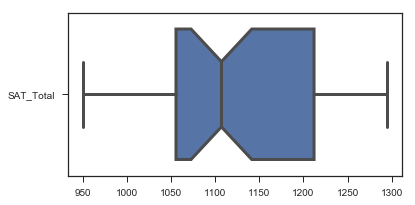

In [45]:
fig = plt.figure(figsize=(6, 3))
plt.tight_layout()

sns.boxplot(data = df[['SAT_Total']], orient='horizontal', fliersize=8, linewidth=3, notch=True, saturation=0.8);

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

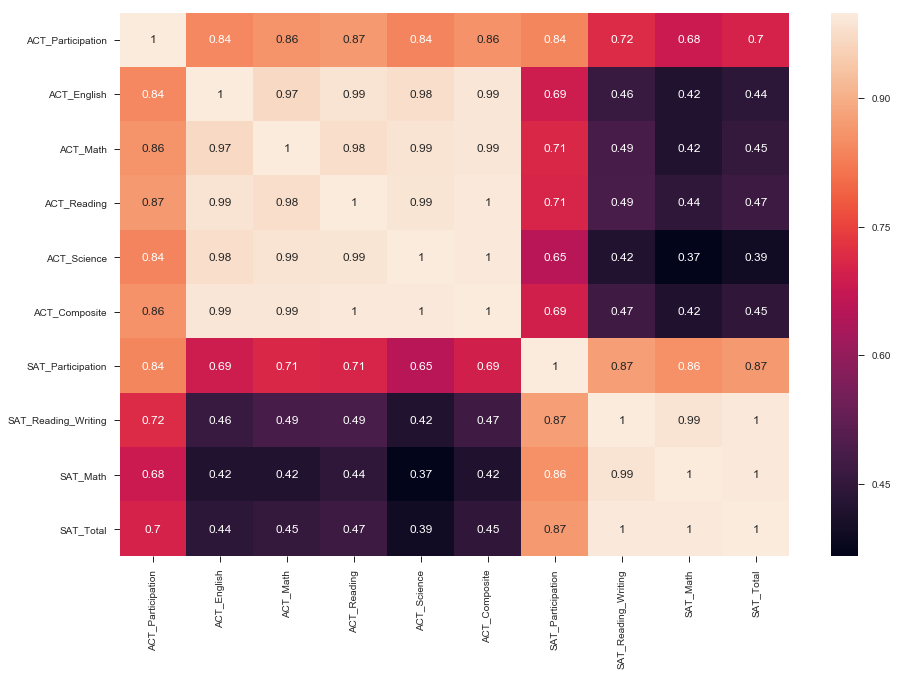

In [46]:
plt.figure(figsize=(15, 10))
sns.heatmap(np.abs(df.corr()), annot = True);


## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

To summarize the distribution of each column, most distributions have a positive skew, with relatively low variance, and bimodal shapes.


#### ACT Composite Distribution Summary:
- The average ACT Composite score is 21 out of 36, which is roughly 58%. 
- With that being said, the shape is a positively skewed bimodal peaking near 2 (mean) and again toward the end of the graph.
- The spread of the distribution is low.

#### SAT Total Distribution Summary:
- The average SAT Total is 1126 out of 1600, which is about 70%.
- Resulting in a bimodal shape with a cluster under the mean (1126) and another under the high value outliers . 
- Additionally, the distribution has a low spread.

#### ACT Participation Distribution Summary:
- The average participation rate is 65% among all states.
- Also resulting in a bimodal shape with a cluster under the mean value of .65 and the high value outliers near 100%. 
- Additionally, the distribution has low spread.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

### Correlation Summary:

##### SAT Participation:
- For the most part, SAT's participation rate has a negative/weak correlation with its own exam subjects.
    - A -0.87 correlation with the SAT Evidence Based Reading and Writing scores.
    - A -0.86 correlation with the SAT Math scores.
    - A -0.88 correlation with the SAT Total scores.
- However, there is a positive association and is heavily/strongly correlated with the ACT's subjects and accumulative score.
    - A 0.69 correlation with the ACT English scores.
    - A 0.71 correlation with the ACT Math scores.
    - A 0.70 correlation with the ACT Reading scores.
    - A 0.65 correlation with the ACT Science scores.
    - A 0.69 correlation with the ACT Composite scores.
- The only negative/weak correlation associated with the ACT is with the ACT Participation rate, which is -0.84.

##### SAT Math:
- For the most part, SAT's math correlation has a positive/strong association with its own exam subjects, but a negative correlation with the participation rate.
    - A 0.99 correlation with the SAT Evidence Based Reading and Writing scores.
    - A 1.00 correlation with the SAT Total scores.
    - A -0.85 correlation with the SAT Participation Rate.
- In addition, there is a negative/weak correlation with the ACT's subjects and accumulative score.
    - A -0.46 correlation with the ACT English scores.
    - A -0.42 correlation with the ACT Math scores.
    - A -0.44 correlation with the ACT Reading scores.
    - A -0.37 correlation with the ACT Science scores.
    - A -0.42 correlation with the ACT Composite scores.
- However, there is a positive/strong correlation associated with the ACT Participation rate, which is 0.68 percent.

#####  SAT Evidence Based Reading and Writing :
- For the most part, SAT's Evidence Based Reading and Writing has a positive/strong association with its own exam subjects, but a negative correlation with the participation rate.
    - A 0.99 correlation with the SAT Math.
    - A 1.00 correlation with the SAT Total scores.
    - A -0.87 correlation with the SAT Participation Rate.
- In addition, there is a negative/weak correlation with the ACT's subjects and accumulative score.
    - A -0.46 correlation with the ACT English scores.
    - A -0.49 correlation with the ACT Math scores.
    - A -0.49 correlation with the ACT Reading scores.
    - A -0.42 correlation with the ACT Science scores.
    - A -0.47 correlation with the ACT Composite scores.
- However, there is a positive/strong correlation associated with the ACT Participation rate, at a 0.68 percent. 

#####  SAT Total:
- For the most part, SAT's Total column has a positive/strong association with its own exam subjects, but a negative correlation with the participation rate.
    - A 1.00 correlation with the SAT Math.
    - A 1.00 correlation with the SAT Total scores.
    - A -0.88 correlation with the SAT Participation Rate.
- In addition, there is a negative/weak correlation with the ACT's subjects and accumulative score.
    - A -0.44 correlation with the ACT English scores.
    - A -0.45 correlation with the ACT Math scores.
    - A -0.47 correlation with the ACT Reading scores.
    - A -0.39 correlation with the ACT Science scores.
    - A -0.44 correlation with the ACT Composite scores.
- However, there is a positive/strong correlation associated with the ACT Participation rate, at a 0.70 percent. 

#####  ACT Participation:
- For the most part, ACT's participation rate has a positive/strong correlation with its own exam subjects.
    - A -0.84 correlation with the ACT English scores.
    - A -0.86 correlation with the ACT Math scores.
    - A -0.87 correlation with the ACT Reading scores.
    - A -0.84 correlation with the ACT Science scores.
    - A -0.66 correlation with the ACT Composite scores.
- However, there is a positive/strong association and is heavily correlated with the ACT's subjects and accumulative score.
    - A 0.71 correlation with the SAT Evidence Based Reading and Writing scores.
    - A 0.68 correlation with the SAT Math scores.
    - A 0.70 correlation with the SAT Total scores.
- The only negative/weak correlation associated with the ACT is with the ACT Participation rate, which is -0.84.

#####  ACT Math:
- For the most part, ACT's Math columns has a positive correlation with its own exam subjects, but a negative correlation with the participation rate.
    - A 0.97 correlation with the ACT English scores.
    - A 0.98 correlation with the ACT Reading scores.
    - A 0.99 correlation with the ACT Science scores.
    - A 0.99 correlation with the ACT Composite scores.
    - A -0.87 correlation with the ACT Participation scores.
- Addtionally, there is a negative/weak association and is not correlated with the SAT's subjects and accumulative score.
    - A -0.48 correlation with the SAT Evidence Based Reading and Writing scores.
    - A -0.42 correlation with the SAT Math scores.
    - A -0.45 correlation with the SAT Total scores.
- The only positive/strong correlation associated with the SAT is with the SAT Participation rate, which is 0.71.

#####  ACT English:
- For the most part, ACT's English columns has a positive/strong correlation with its own exam subjects and accumulative score, but a negative correlation with the participation rate.
    - A 0.97 correlation with the ACT Math scores.
    - A 0.99 correlation with the ACT Reading scores.
    - A 0.98 correlation with the ACT Science scores.
    - A 0.99 correlation with the ACT Composite scores.
    - A -0.84 correlation with the ACT Participation scores.
- Addtionally, there is a negative/weak association and is not correlated with the SAT's subjects and accumulative score.
    - A -0.46 correlation with the SAT Evidence Based Reading and Writing scores.
    - A -0.42 correlation with the SAT Math scores.
    - A -0.44 correlation with the SAT Total scores.
- The only positive correlation associated with the SAT is with the SAT Participation rate, which is 0.69.

#####  ACT Science:
- For the most part, ACT's Science columns has a positive/strong correlation with its own exam subjects and accumulative score, but a negative correlation with the participation rate.
    - A 0.98 correlation with the ACT English scores.
    - A 0.99 correlation with the ACT Math scores.
    - A 0.99 correlation with the ACT Reading scores.
    - A 1.00 correlation with the ACT Composite scores.
    - A -0.84 correlation with the ACT Participation scores.
- Addtionally, there is a negative/weak association and is not correlated with the SAT's subjects and accumulative score.
    - A -0.42 correlation with the SAT Evidence Based Reading and Writing scores.
    - A -0.37 correlation with the SAT Math scores.
    - A -0.39 correlation with the SAT Total scores.
- The only positive/strong correlation associated with the SAT is with the SAT Participation rate, which is 0.65.

#####  ACT Composite:

- For the most part, ACT's Math columns has a positive/strong correlation with its own exam subjects and accumulative score, but a negative correlation with the participation rate.
    - A 0.99 correlation with the ACT English scores.
    - A 0.99 correlation with the ACT Math scores.
    - A 1.00 correlation with the ACT Reading scores.
    - A 1.00 correlation with the ACT SCience scores.
    - A -0.86 correlation with the ACT Participation scores.
- Addtionally, there is a negative/weak association and is not correlated with the SAT's subjects and accumulative score.
    - A -0.47 correlation with the SAT Evidence Based Reading and Writing scores.
    - A -0.42 correlation with the SAT Math scores.
    - A -0.45 correlation with the SAT Total scores.
- The only positive/strong correlation associated with the SAT is with the SAT Participation rate, which is 0.69.

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

#### Hypothesis:
- H0: The ACT and SAT Participation Rates do not have any difference/effect between them. 
- H1: There is a difference between ACT and SAT Participation Rates. 

In [64]:
import scipy.stats as stats

In [65]:
result = stats.ttest_ind(df['SAT_Participation'], df['ACT_Participation'])
result.statistic, result.pvalue
t_stat, p_value = stats.ttest_ind(df['SAT_Participation'], df['ACT_Participation'])
print(t_stat, p_value)

-3.8085778908170576 0.00024134203698662128


##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [47]:
def confidence_interval(x):
    z_score_95 = 1.96
    ci_lower_95 = x.mean() - z_score_95 * x.sem() 
    ci_upper_95 = x.mean() + z_score_95 * x.sem()
    return ci_lower_95, ci_upper_95
    

In [48]:
confidence_interval(df['SAT_Participation'])

(0.3012207711116877, 0.4948576602608616)

In [49]:
confidence_interval(df['ACT_Participation'])

(0.5643369049287187, 0.7407611342869677)

#### Conclusion:

- The result for p-value is less than alpha (0.5); therefore, the H-naught can be rejected.

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, evidence shows the participation rates between both exams are different due to the fact that the confidence intervals for each rate do not overlap.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

No, neither are correlated. They have a weak relationship of -0.42.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

Conclusions can be made on the correlation of subjects, total scores, and participation rates. We can evaluate how well students are prepared, room for improvement, and what exam is popular within the state. 

## Graphs:

In [53]:
df.sort_values('SAT_Participation', ascending= False, inplace = True)

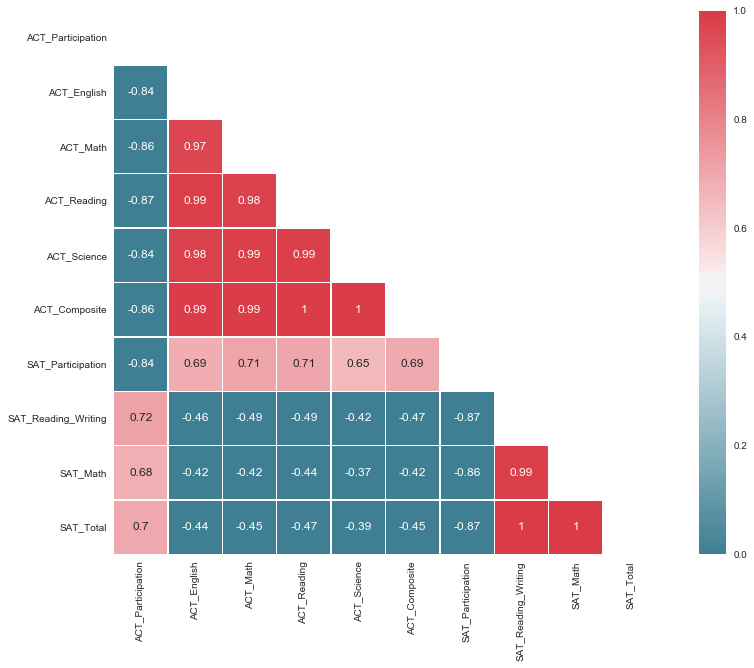

In [54]:
sns.set(style="white")

corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot = True, mask=mask, cmap=cmap, vmin = 0, vmax= 1, center=.5,
            square=True, linewidths=.3);

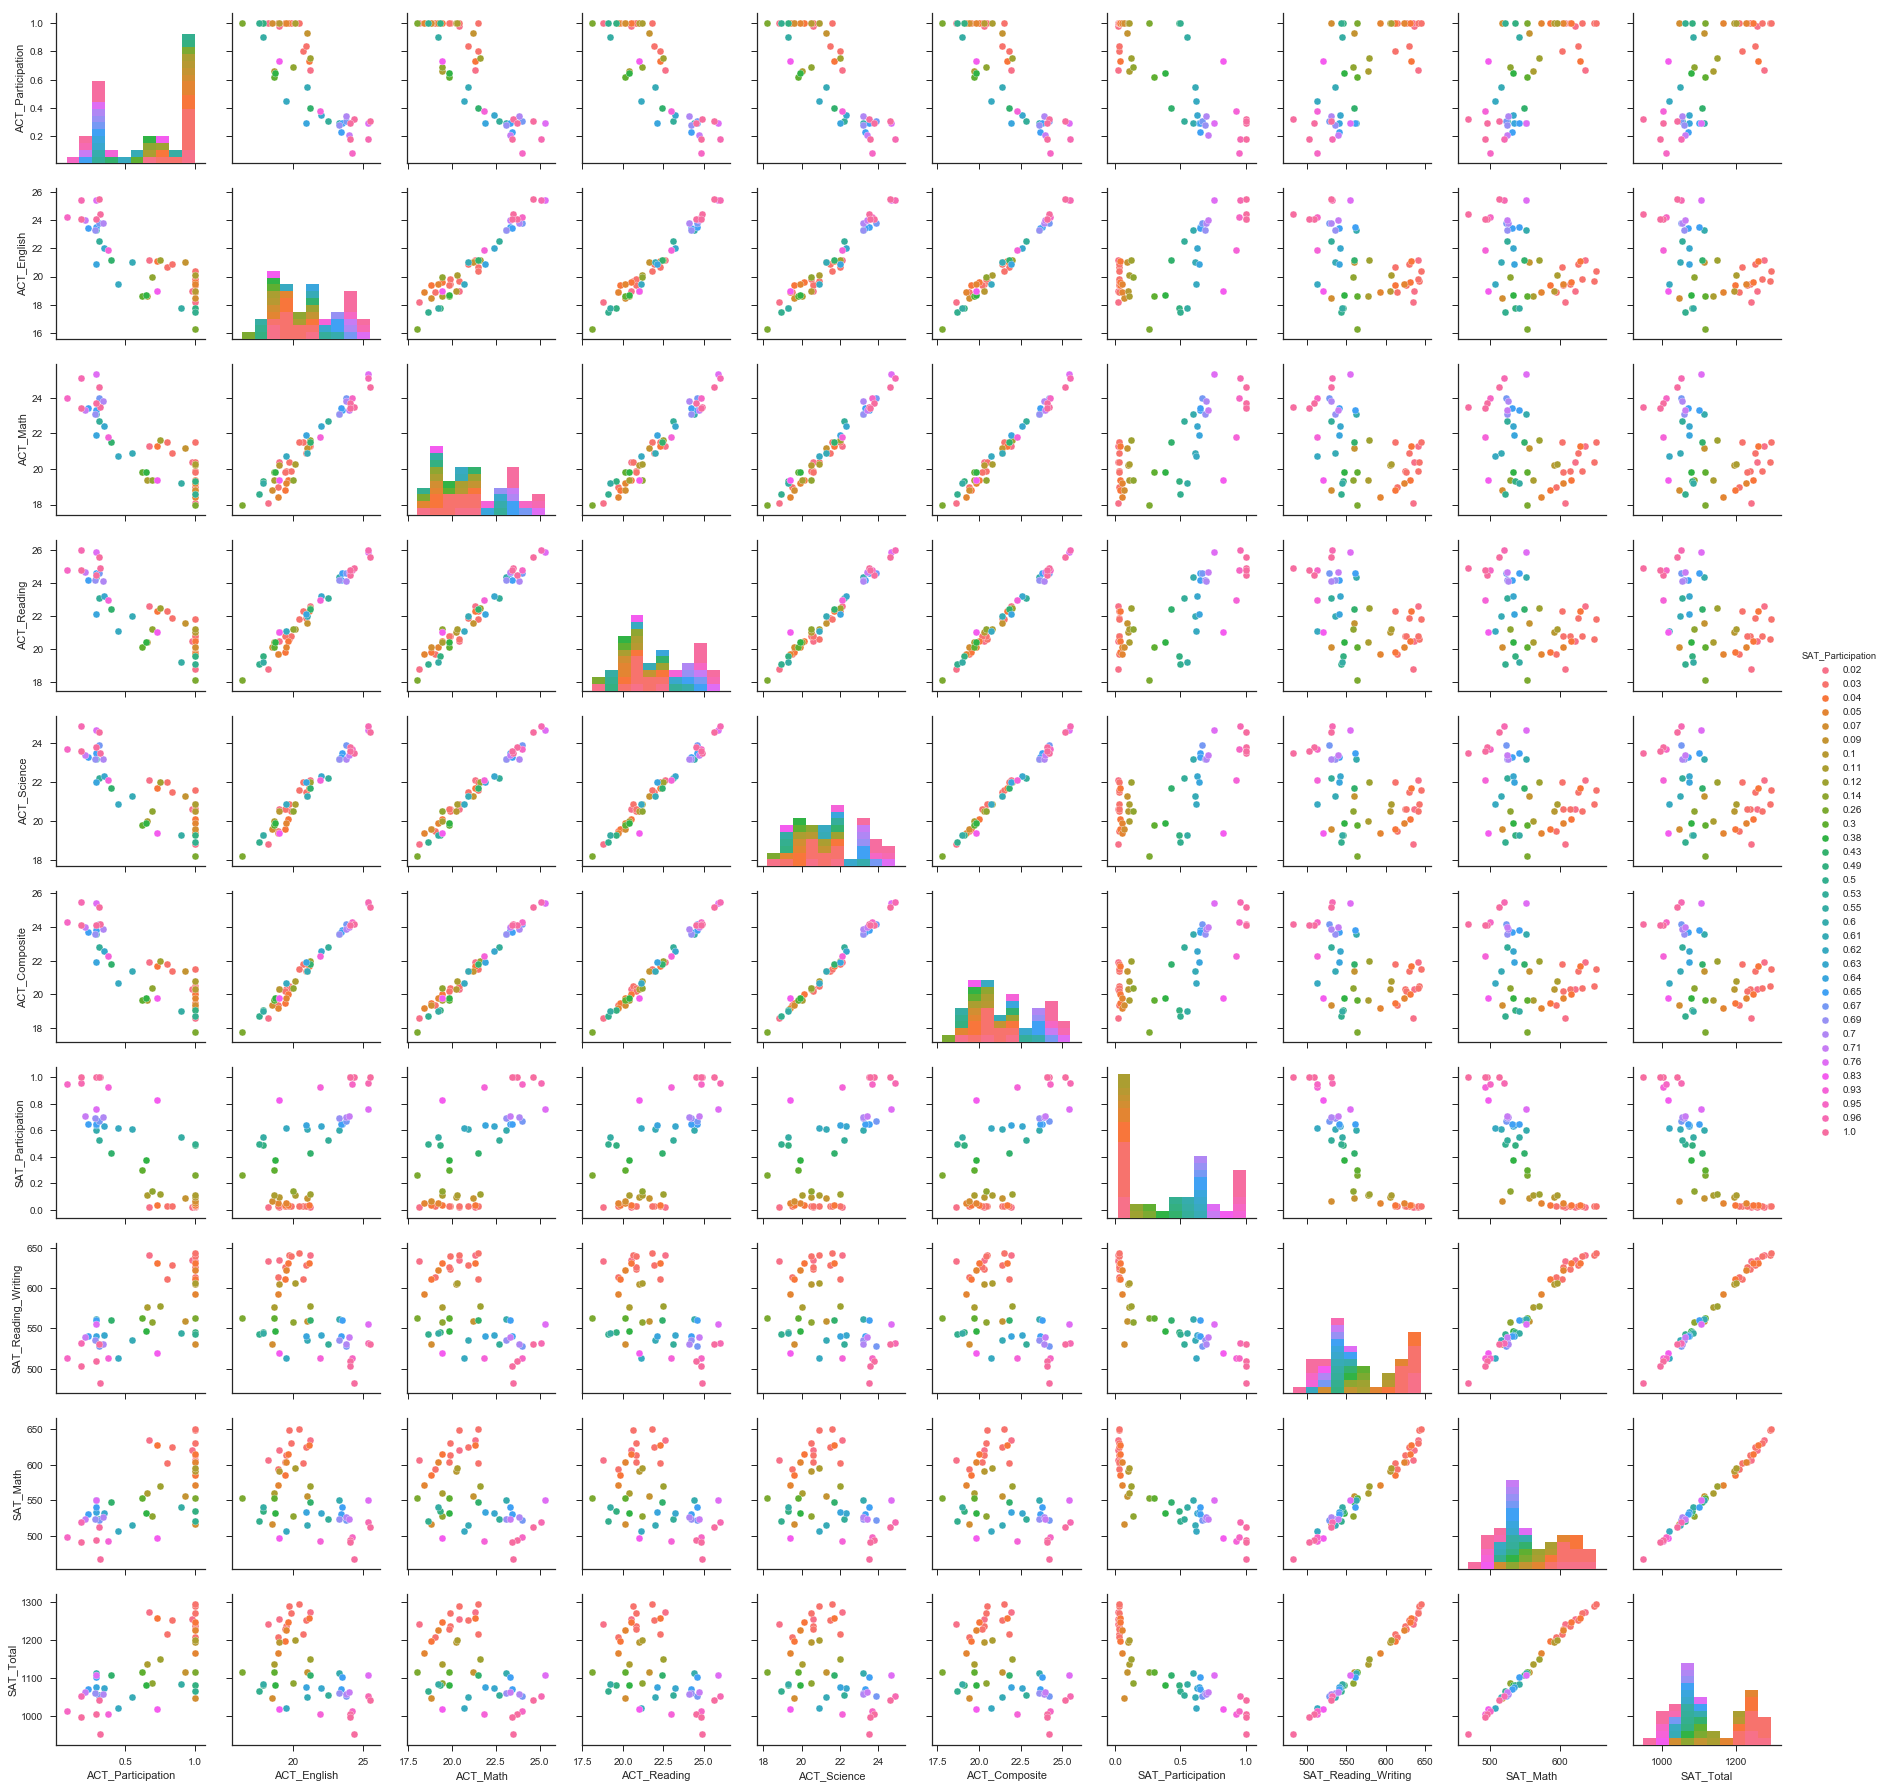

In [55]:
sns.set(style="ticks")

sns.pairplot(df, hue = "SAT_Participation")

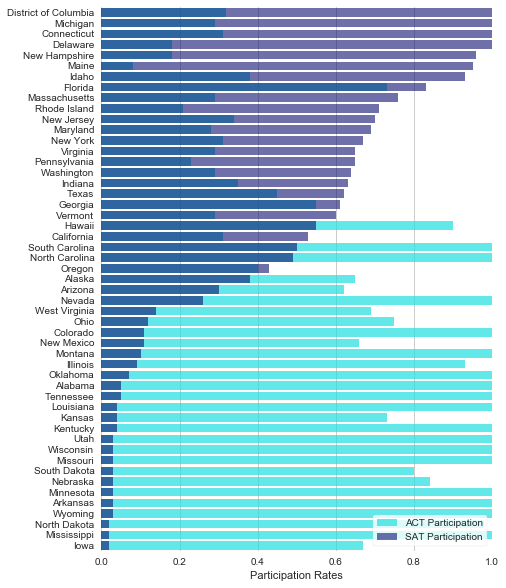

In [56]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(7, 10))

sns.set_color_codes("muted")
sns.barplot(x="ACT_Participation", y="State", data=df,
            label="ACT Participation", color="aqua", alpha = .7)

sns.set_color_codes("deep")
sns.barplot(x="SAT_Participation", y="State", data=df,
            label="SAT Participation", color="navy", alpha = .6)

ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Participation Rates")
sns.despine(left=True, bottom = True)